In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# Number of row and column in  the dataset

print(" Number of row in the dataset are :", df.shape[0])
print(" Number of column in the dataset are :", df.shape[1])

 Number of row in the dataset are : 4071
 Number of column in the dataset are : 9


In [4]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 9 columns):
Sno                         4071 non-null int64
Date                        4071 non-null object
Time                        4071 non-null object
State/UnionTerritory        4071 non-null object
ConfirmedIndianNational     4071 non-null object
ConfirmedForeignNational    4071 non-null object
Cured                       4071 non-null int64
Deaths                      4071 non-null int64
Confirmed                   4071 non-null int64
dtypes: int64(4), object(5)
memory usage: 286.4+ KB


In [5]:
# dataset describe

df.describe()

,Sno,Cured,Deaths,Confirmed
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,2036.000000,3111.314910,168.402113,5732.080324
std,1175.340802,10887.115076,737.798086,19306.478679
min,1.000000,0.000000,0.000000,0.000000
25%,1018.500000,3.000000,0.000000,30.000000
50%,2036.000000,67.000000,3.000000,335.000000
75%,3053.500000,1386.500000,36.500000,3055.000000
max,4071.000000,140325.000000,10289.000000,254427.000000


In [6]:
# check weather dataset contain any null values

df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
# check dataset contain any duplicate value

print("Number of duplicate value in the dataset are :", sum(df.duplicated()))

Number of duplicate value in the dataset are : 0


In [8]:
# Remove the unneccesary column in the dataset

df_new = df.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)

df_new.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,0,0,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3


In [16]:
# select the data of date 10/07/20

covid_new = df_new[df_new['Date'] == '10/07/20']

In [17]:
covid_new.sort_values('Confirmed')

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3948,3949,10/07/20,8:00 AM,Meghalaya,66,2,113
3955,3956,10/07/20,8:00 AM,Sikkim,72,0,134
3927,3928,10/07/20,8:00 AM,Andaman and Nicobar Islands,83,0,151
3949,3950,10/07/20,8:00 AM,Mizoram,133,0,197
3929,3930,10/07/20,8:00 AM,Arunachal Pradesh,120,2,302
3934,3935,10/07/20,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,189,0,411
3932,3933,10/07/20,8:00 AM,Chandigarh,403,7,523
3950,3951,10/07/20,8:00 AM,Nagaland,304,0,673
3944,3945,10/07/20,8:00 AM,Ladakh,915,1,1055
3939,3940,10/07/20,8:00 AM,Himachal Pradesh,846,11,1140


In [18]:
# sort the dataset of top 10 state with confirmed cases on 10/07/20

covid_new.sort_values(by='Confirmed', ascending=False)[:10]

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3928,3929,10/07/20,8:00 AM,Andhra Pradesh,12154,277,23814
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563


In [19]:
# sort the dataset of top 10 state with Death cases on 10/07/20

covid_new.sort_values(by="Deaths", ascending=False)[:10]


,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3945,3946,10/07/20,8:00 AM,Madhya Pradesh,12232,634,16341
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946


In [20]:
# sort the dataset of top 10 state with most number of recovery on 10/07/20

covid_new.sort_values(by="Cured", ascending=False)[:10]


,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3938,3939,10/07/20,8:00 AM,Haryana,14510,287,19369
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105


In [21]:
df_age = pd.read_csv('Dataset/AgeGroupDetails.csv')
df_age.info()
df_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [22]:

df_age.sort_values(by="TotalCases", ascending=False)

,Sno,AgeGroup,TotalCases,Percentage
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
6,7,60-69,89,12.86%
5,6,50-59,77,11.13%
7,8,70-79,28,4.05%
1,2,10-19,27,3.90%
0,1,0-9,22,3.18%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


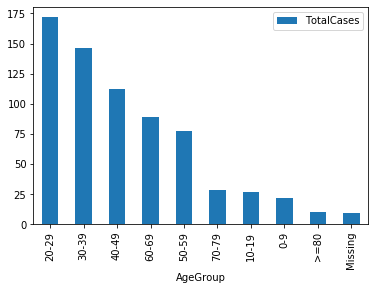

In [23]:
df_age.sort_values(by="TotalCases", ascending=False).plot(x = 'AgeGroup', y='TotalCases', kind = 'bar')

In [24]:
df_hospital = pd.read_csv("Dataset/HospitalBedsIndia.csv")

df_hospital.info()
df_hospital.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
Sno                                 37 non-null int64
State/UT                            37 non-null object
NumPrimaryHealthCenters_HMIS        37 non-null object
NumCommunityHealthCenters_HMIS      37 non-null int64
NumSubDistrictHospitals_HMIS        30 non-null float64
NumDistrictHospitals_HMIS           37 non-null int64
TotalPublicHealthFacilities_HMIS    37 non-null int64
NumPublicBeds_HMIS                  37 non-null int64
NumRuralHospitals_NHP18             37 non-null int64
NumRuralBeds_NHP18                  37 non-null int64
NumUrbanHospitals_NHP18             37 non-null int64
NumUrbanBeds_NHP18                  37 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 3.6+ KB


,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [25]:
df_hospital.sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)[1:10]

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
33,34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156
20,21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048
28,29,Rajasthan,2463,579,64.0,33,3139,51844,602,21088,150,10760
16,17,Karnataka,2547,207,147.0,42,2943,56333,2471,21072,374,49093
30,31,Tamil Nadu,1854,385,310.0,32,2581,72616,692,40179,525,37353
11,12,Gujarat,1770,385,44.0,37,2236,41129,364,11715,122,20565
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
35,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
19,20,Madhya Pradesh,1420,324,72.0,51,1867,38140,334,10020,117,18819


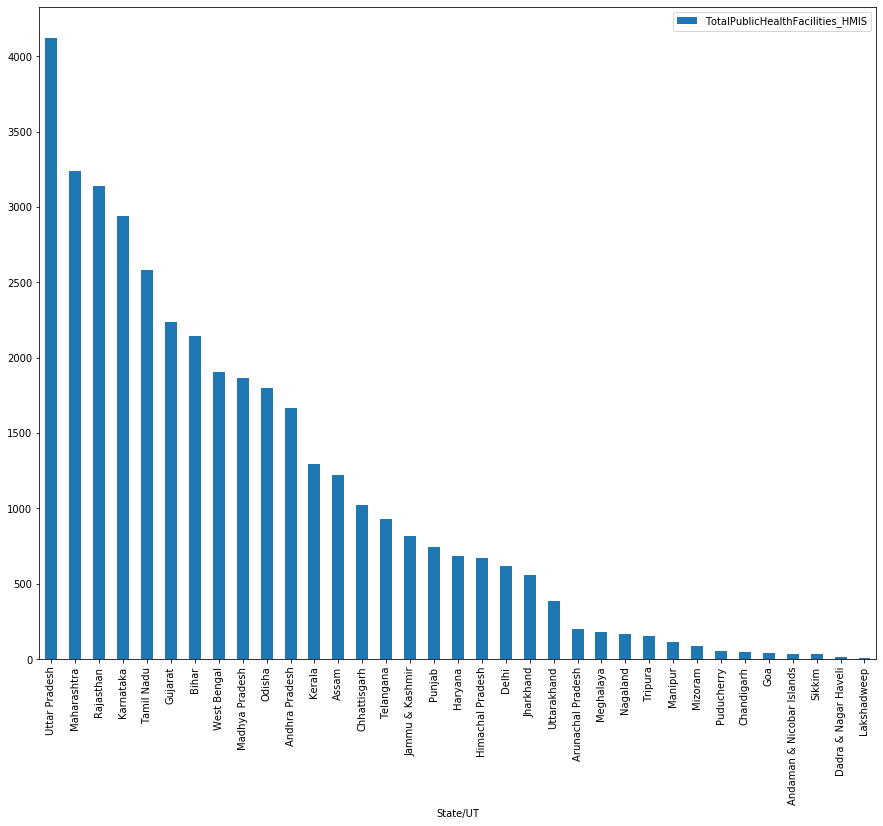

In [26]:
df_hospital.sort_values(by="TotalPublicHealthFacilities_HMIS", ascending=False)[1:36].plot(x='State/UT',y='TotalPublicHealthFacilities_HMIS',kind='bar', figsize=(15,12))


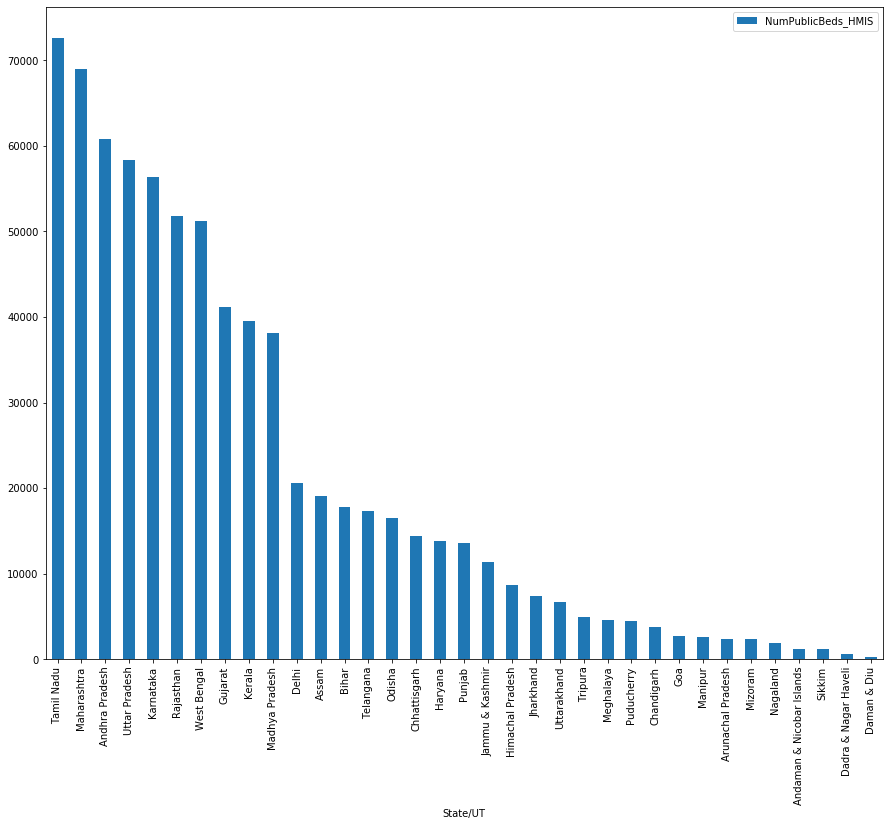

In [27]:
df_hospital.sort_values(by="NumPublicBeds_HMIS", ascending=False)[1:36].plot(x='State/UT',y='NumPublicBeds_HMIS',kind='bar', figsize=(15,12))


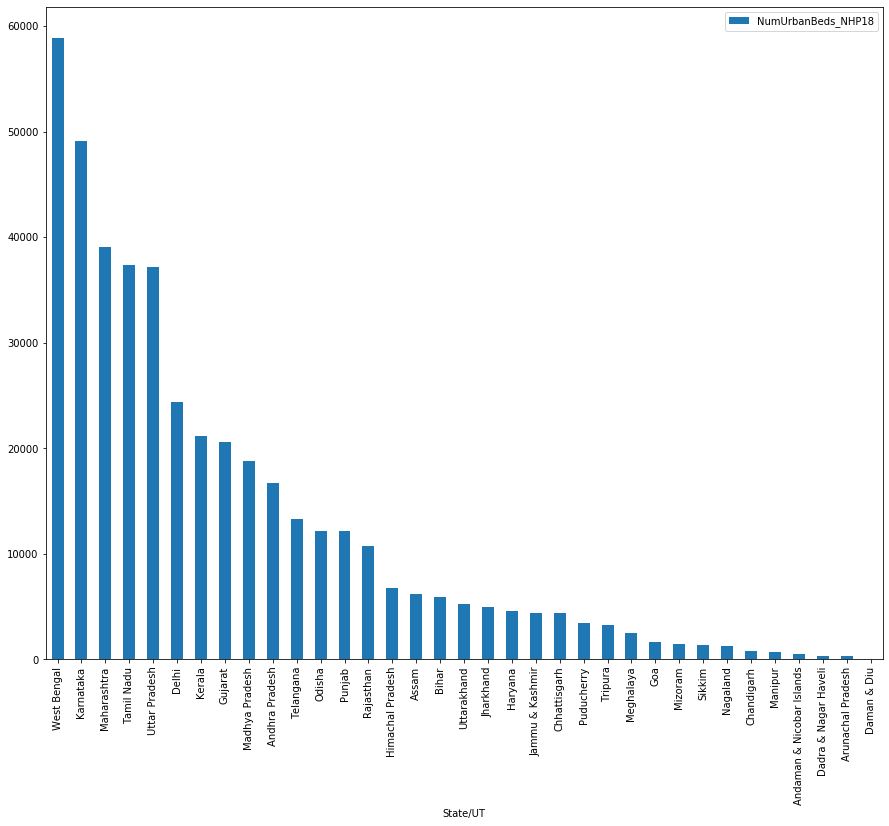

In [28]:
df_hospital.sort_values(by="NumUrbanBeds_NHP18", ascending=False)[1:36].plot(x='State/UT',y='NumUrbanBeds_NHP18',kind='bar', figsize=(15,12))


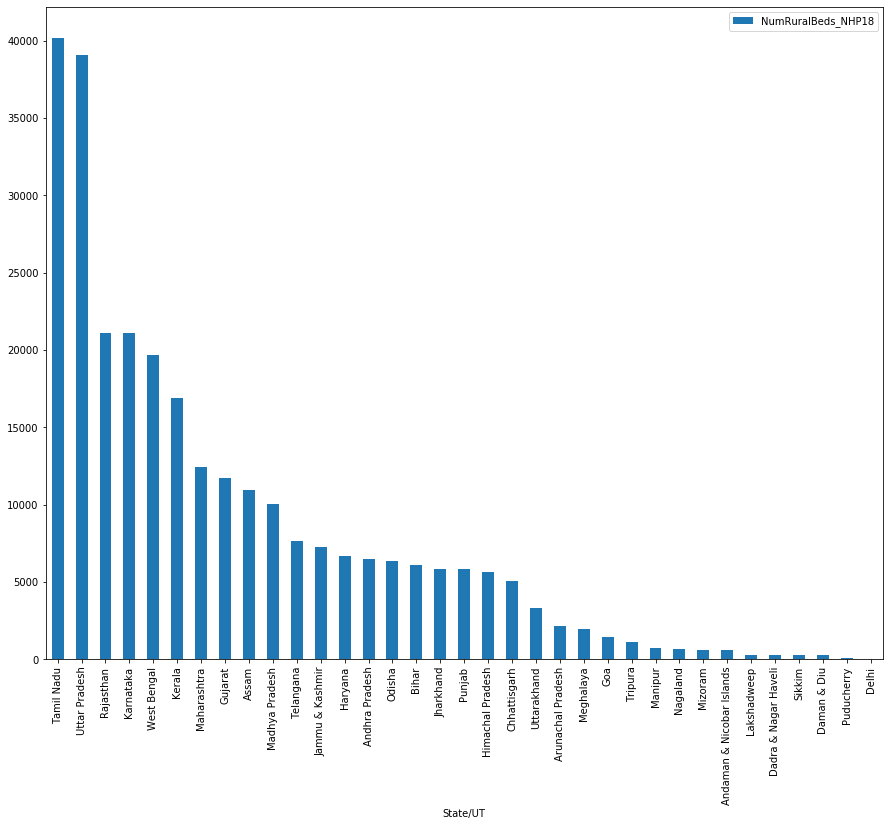

In [29]:
df_hospital.sort_values(by="NumRuralBeds_NHP18", ascending=False)[1:36].plot(x='State/UT',y='NumRuralBeds_NHP18',kind='bar', figsize=(15,12))


In [42]:
df_individual = pd.read_csv("Dataset/IndividualDetails.csv")
df.info()
df_individual.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 9 columns):
Sno                         4071 non-null int64
Date                        4071 non-null object
Time                        4071 non-null object
State/UnionTerritory        4071 non-null object
ConfirmedIndianNational     4071 non-null object
ConfirmedForeignNational    4071 non-null object
Cured                       4071 non-null int64
Deaths                      4071 non-null int64
Confirmed                   4071 non-null int64
dtypes: int64(4), object(5)
memory usage: 286.4+ KB


,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [56]:
df_individual['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

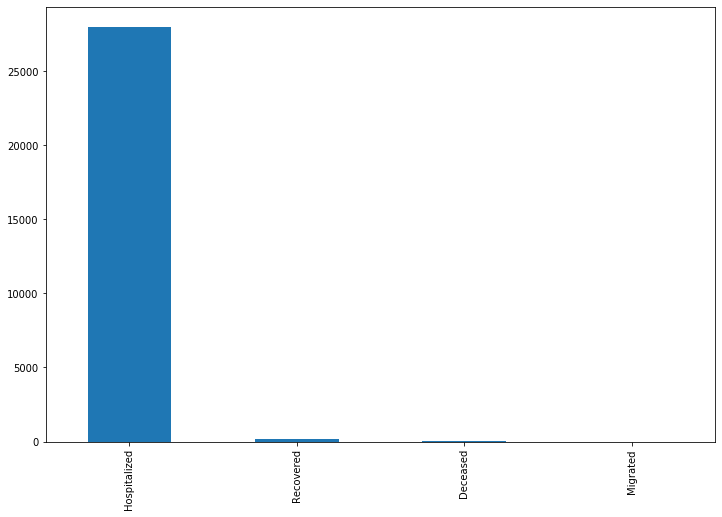

In [55]:
df_individual['current_status'].value_counts().plot(kind='bar', figsize=(12,8))


In [58]:
df_icmr = pd.read_csv("Dataset/ICMRTestingLabs.csv")
df_icmr['lab'].value_counts()

K.A.P. Viswanatham Government Medical College, Trichy                          2
Department of Microbiology, Dayanand Medical College and Hospital, Ludhiana    1
Midnapore Medical College, Midnapore                                           1
Centre for DNA Fingerprinting and Diagnostics (CDFD), Hyderabad                1
Sawai Man Singh (SMS) Medical College, Jaipur                                  1
                                                                              ..
Kalpana Chawla Government Medical College and Hospital, Karnal                 1
Jawaharlal Nehru Institute of Medical Sciences, Imphal                         1
Tomo Riba Institute of Health & Medical Sciences, Naharlagun                   1
PSG Hospitals Diagnostic Centre, Coimbatore                                    1
Dr. Sampurnanand Medical College, Jodhpur                                      1
Name: lab, Length: 266, dtype: int64

In [118]:
df_testing = pd.read_csv("Dataset/StatewiseTestingDetails.csv")
df_testing

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
3013,2020-07-08,West Bengal,572523.0,NaN,24823.0
3014,2020-07-09,West Bengal,583328.0,NaN,25911.0
3015,2020-07-10,West Bengal,593967.0,NaN,27109.0
3016,2020-07-11,West Bengal,605370.0,NaN,28453.0


In [119]:
df_testing_details = df_testing.dropna(subset=['Negative', 'Positive'])
df_testing_details.sort_values(by='Positive', ascending = False)[:10]

,Date,State,TotalSamples,Negative,Positive
1770,2020-07-12,Maharashtra,1321715.0,1062678,259037.0
1769,2020-07-11,Maharashtra,1289325.0,1037883,251442.0
1768,2020-07-10,Maharashtra,1257564.0,1014697,242867.0
1767,2020-07-09,Maharashtra,1225831.0,990978,234853.0
1766,2020-07-08,Maharashtra,1194565.0,966881,227684.0
1765,2020-07-07,Maharashtra,1164860.0,944044,220816.0
1764,2020-07-06,Maharashtra,1138706.0,922627,216079.0
1763,2020-07-05,Maharashtra,1116112.0,905891,210221.0
1762,2020-07-04,Maharashtra,1085160.0,881344,203816.0
1761,2020-07-03,Maharashtra,1052643.0,856238,196405.0


In [120]:
df_testing_details['TotalSamples'].max()

1321715.0

In [91]:
(df_testing_details['Positive'].value_counts().mean()/df_testing_details['TotalSamples'].value_counts().mean())*100

144.7782546494993

In [100]:
df_testing_details['Positive'].max()

259037.0

In [ ]:
df_testing.sort_values(by='TotalSamples', ascending = False)[:20].plot(x='Positive',y='TotalSamples',kind='bar')

In [104]:
(df_testing_details['Positive'].max()/df_testing_details['TotalSamples'].max())*100

19.598551881457045

In [109]:
df_testing_details['Negative'].max()/df_testing_details['TotalSamples'].max()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [110]:
df_testing_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2919
Data columns (total 5 columns):
Date            2078 non-null object
State           2078 non-null object
TotalSamples    2078 non-null float64
Negative        2078 non-null object
Positive        2078 non-null float64
dtypes: float64(2), object(3)
memory usage: 177.4+ KB


In [130]:

df_tests = pd.DataFrame(df_testing_details)

df_tests['Negative'] = pd.to_numeric(df_tests['Negative'], errors='coerce')

In [133]:
(df_tests["Negative"].max()/df_testing_details['TotalSamples'].max())*100

69.87992156316949

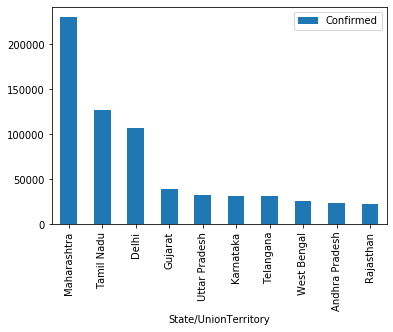

In [33]:
# plot the bar graph of top 10 state with most number of confirmed cases on 10/07/20

covid_new.sort_values(by="Confirmed", ascending=False)[:10].plot(x='State/UnionTerritory',y='Confirmed',kind='bar')


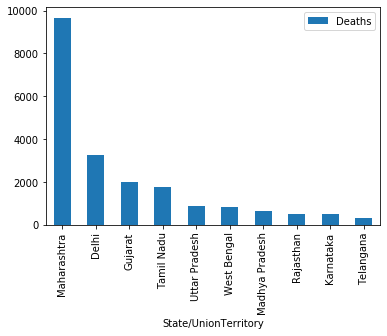

In [34]:
covid_new.sort_values(by="Deaths", ascending=False)[:10].plot(x='State/UnionTerritory',y='Deaths',kind='bar')



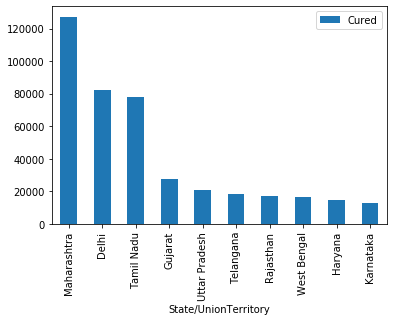

In [35]:
covid_new.sort_values(by="Cured", ascending=False)[:10].plot(x='State/UnionTerritory',y='Cured',kind='bar')


Text(0, 0.5, 'Number of cases')

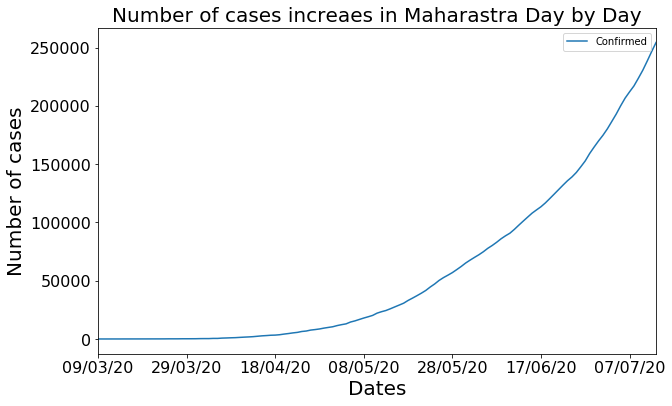

In [36]:
covid_mh = df[df['State/UnionTerritory'] == "Maharashtra"].plot(x = "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_mh.set_title("Number of cases increaes in Maharastra Day by Day", fontsize=20)
covid_mh.set_xlabel("Dates", fontsize = 20)
covid_mh.set_ylabel("Number of cases", fontsize= 20)

Text(0, 0.5, 'Number of cases')

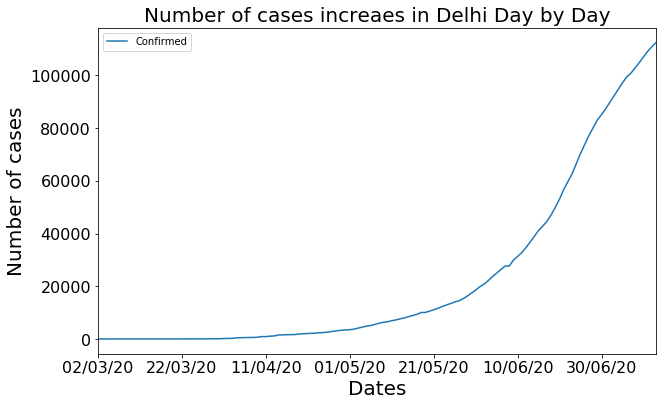

In [37]:
covid_dh = df[df['State/UnionTerritory']== 'Delhi'].plot(x =  "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_dh.set_title("Number of cases increaes in Delhi Day by Day", fontsize=20)
covid_dh.set_xlabel("Dates", fontsize = 20)
covid_dh.set_ylabel("Number of cases", fontsize= 20)


Text(0, 0.5, 'Number of cases')

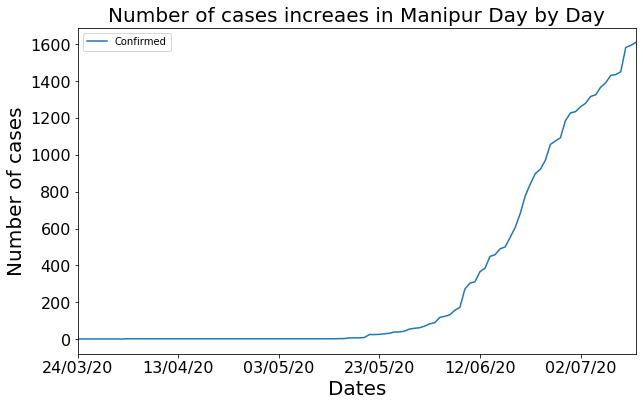

In [38]:
covid_mani = df[df['State/UnionTerritory']== 'Manipur'].plot(x =  "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_mani.set_title("Number of cases increaes in Manipur Day by Day", fontsize=20)
covid_mani.set_xlabel("Dates", fontsize = 20)
covid_mani.set_ylabel("Number of cases", fontsize= 20)

Text(0, 0.5, 'No. of cases')

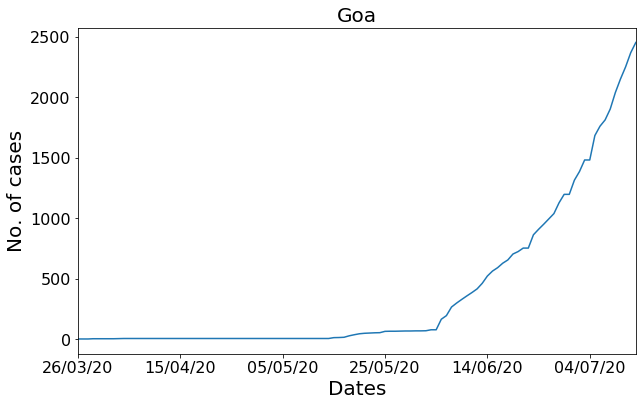

In [39]:
#graph showing Goa not having new cases in april month
goa=df[df['State/UnionTerritory']=='Goa'].plot(x='Date',y='Confirmed',figsize = (10,6),fontsize=16)
goa.legend_.remove()
goa.set_title("Goa", fontsize=20)
goa.set_xlabel('Dates', fontsize=20)
goa.set_ylabel('No. of cases', fontsize=20)